In [2]:
import pandas as pd 

In [9]:
dataset=pd.read_csv("german_credit_data.csv")
dataset.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [13]:
dataset=dataset.drop(columns='Unnamed: 0')

In [14]:
dataset.shape                               

(1000, 10)

# Data Type Fixing

In [15]:
numerical_col=dataset.select_dtypes(include='number').columns
numerical_col

Index(['Age', 'Job', 'Credit amount', 'Duration'], dtype='object')

In [17]:
categorical_cal=dataset.select_dtypes(include='object').columns
categorical_cal

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose',
       'Risk'],
      dtype='object')

# Missing Values Handling

In [18]:
dataset.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [20]:
dataset['Saving accounts']=dataset['Saving accounts'].fillna('unknown')
dataset['Checking account']=dataset['Checking account'].fillna('unknown')


In [21]:
dataset.isna().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

# Target Variable Cleaning

In [22]:
dataset['Risk'] = dataset['Risk'].map({'good': 0, 'bad': 1})
dataset['Risk'].unique()

array([0, 1])

# Outlier Check

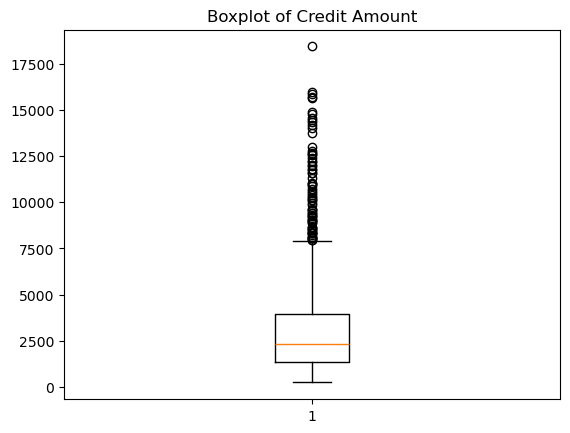

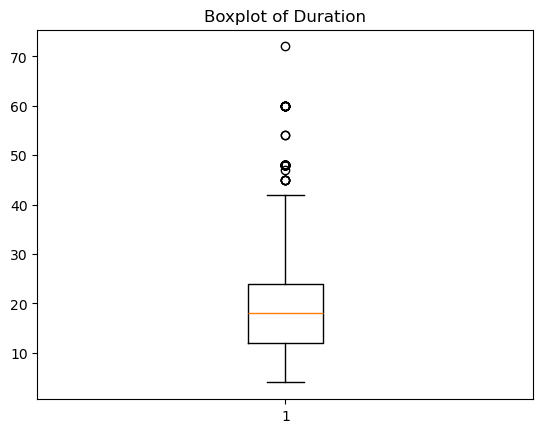

In [30]:
import matplotlib.pyplot as plt

plt.figure()
plt.boxplot(x=dataset['credit_amount'])
plt.title('Boxplot of Credit Amount')
plt.show()

plt.figure()
plt.boxplot(x=dataset['duration'])
plt.title('Boxplot of Duration')
plt.show()


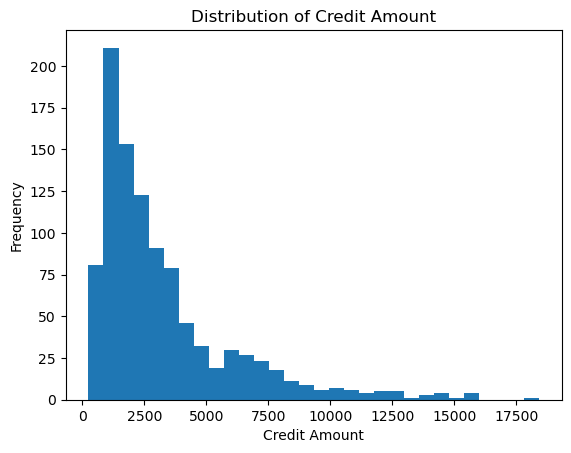

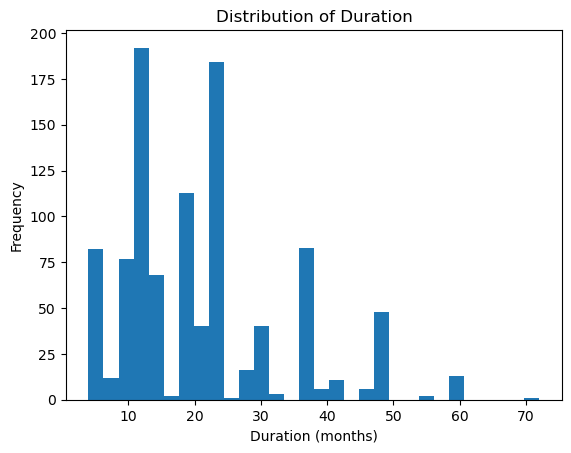

In [31]:
plt.figure()
plt.hist(dataset['credit_amount'], bins=30)
plt.title('Distribution of Credit Amount')
plt.xlabel('Credit Amount')
plt.ylabel('Frequency')
plt.show()

plt.figure()
plt.hist(dataset['duration'], bins=30)
plt.title('Distribution of Duration')
plt.xlabel('Duration (months)')
plt.ylabel('Frequency')
plt.show()


In [32]:
Q1 = dataset['credit_amount'].quantile(0.25)
Q3 = dataset['credit_amount'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = dataset[ (dataset['credit_amount'] < lower_bound) |  (dataset['credit_amount'] > upper_bound)  ]

print("IQR Outliers count:", outliers_iqr.shape[0])


IQR Outliers count: 72


In [ ]:
from scipy.stats import zscore

df=dataset.copy()
df['credit_amount_zscore'] = zscore(df['credit_amount'])

outliers_z = df[abs(df['credit_amount_zscore']) > 3]

print("Z-score Outliers count:", outliers_z.shape[0])


Z-score Outliers count: 25


# Feature Name Cleaning

In [23]:
dataset.columns = (
    dataset.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
)
dataset.columns


Index(['age', 'sex', 'job', 'housing', 'saving_accounts', 'checking_account',
       'credit_amount', 'duration', 'purpose', 'risk'],
      dtype='object')

#  Feature Engineering

In [36]:
# 1️⃣ Credit Amount per Month
dataset['credit_per_month'] = dataset['credit_amount'] / dataset['duration']
dataset['credit_per_month']


0      194.833333
1      123.979167
2      174.666667
3      187.666667
4      202.916667
          ...    
995    144.666667
996    128.566667
997     67.000000
998     41.000000
999    101.688889
Name: credit_per_month, Length: 1000, dtype: float64

In [37]:
# 2️⃣ Age Risk Band
def age_band(age):
    if age < 25:
        return 'young'
    elif age <= 60:
        return 'mature'
    else:
        return 'senior'

dataset['age_risk_band'] = dataset['age'].apply(age_band)
dataset['age_risk_band']


0      senior
1       young
2      mature
3      mature
4      mature
        ...  
995    mature
996    mature
997    mature
998     young
999    mature
Name: age_risk_band, Length: 1000, dtype: object

In [38]:
# 3️⃣ Job Stability Flag
dataset['job_stability'] = dataset['job'].apply(lambda x: 1 if x >= 2 else 0)


In [39]:
# 4️⃣ Housing Stability Feature
#  Logic    Home ownership = lower default probability

dataset['housing_stability'] = df['housing'].map({
    'own': 1,
    'rent': 0,
    'free': 0
})


In [40]:
# 5️⃣ Financial Account Availability Flag
#  Logic     Saving + Checking info missing Risk
dataset['has_saving_account'] = dataset['saving_accounts'].apply(
    lambda x: 0 if x == 'unknown' else 1
)

dataset['has_checking_account'] = dataset['checking_account'].apply(
    lambda x: 0 if x == 'unknown' else 1
)


In [41]:
# Final shape check (optional but recommended)
print(dataset.shape)
print(dataset.isnull().sum())

# Save cleaned dataset
dataset.to_csv(
    "german_credit_cleaned.csv",
    index=False
)

print(" german_credit_cleaned.csv saved successfully")


(1000, 16)
age                     0
sex                     0
job                     0
housing                 0
saving_accounts         0
checking_account        0
credit_amount           0
duration                0
purpose                 0
risk                    0
credit_per_month        0
age_risk_band           0
job_stability           0
housing_stability       0
has_saving_account      0
has_checking_account    0
dtype: int64
 german_credit_cleaned.csv saved successfully


In [5]:
pd.read_csv('german_credit_cleaned.csv').head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,risk,credit_per_month,age_risk_band,job_stability,housing_stability,has_saving_account,has_checking_account
0,67,male,2,own,unknown,little,1169,6,radio/TV,0,194.833333,senior,1,1,0,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,1,123.979167,young,1,1,1,1
2,49,male,1,own,little,unknown,2096,12,education,0,174.666667,mature,0,1,1,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0,187.666667,mature,1,0,1,1
4,53,male,2,free,little,little,4870,24,car,1,202.916667,mature,1,0,1,1
